# Homework 2
**Michele Sprocatti 2003803**

**Risultato helper ping MacOS**

ping [-AaDdfnoQqRrv] [-c count] [-G sweepmaxsize] 
[-g sweepminsize] [-h sweepincrsize] [-i wait]
[-l preload] [-M mask | time] [-m ttl] [-p pattern]
[-S src_addr] [-s packetsize] [-t timeout][-W waittime]
[-z tos] host


ping [-AaDdfLnoQqRrv] [-c count] [-I iface] [-i wait]
[-l preload] [-M mask | time] [-m ttl] [-p pattern] [-S src_addr]
[-s packetsize] [-T ttl] [-t timeout] [-W waittime]
[-z tos] mcast-group


**Server a cui collegarsi**
* atl.speedtest.clouvider.net
* nyc.speedtest.clouvider.net ttl minimo 17 a casa
* lon.speedtest.clouvider.net
* la.speedtest.clouvider.net
* paris.testdebit.info
* lille.testdebit.info
* lyon.testdebit.info
* aix-marseille.testdebit.info
* bordeaux.testdebit.info

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Funzione per trovare il minimo TTL richiesto dato il server tramite ping successivi**

In [2]:
def find_min_ttl(s:str):
    notDone=True
    i=0
    while(notDone):
        es=os.popen('ping -m '+str(i)+' -c 1 '+s).read()
        if('100.0% packet loss' in es):
            i+=1
        else:
            notDone=False
    return i


**Funzione per trovare il minimo TTL richiesto tramite comando traceroute**

In [3]:
def verify_min_ttl(s:str):
    es=os.popen('traceroute '+s)
    v=es.read().split('\n')
    return int(v[len(v)-2].split(' ')[0])

Trovo il minimo TTL richiesto per arrivare al server specificato sia tramite la funzione che fa ping successivi sia tramite la funzione che usa traceroute.
Ovviamente i due valori devono coincidere.

In [4]:
k=8
Lb=np.array(range(29,1450,29))
server='atl.speedtest.clouvider.net'
TTL=find_min_ttl(server)
print("Minimo TTL da sequenza di ping: "+str(TTL))
TTLtrace=verify_min_ttl(server)
print("Minimo TTL da traceroute: "+str(TTLtrace))

Minimo TTL da sequenza di ping: 13


traceroute to atl.speedtest.clouvider.net (92.119.16.139), 64 hops max, 52 byte packets


Minimo TTL da traceroute: 13


Sovrascrivo file con i dati dell'esecuzione precedente se esistono, altrimenti creo due file nuovi.

In [168]:
if(TTL==TTLtrace):
    file=open("res.txt","w")
    file1=open("resTab.txt","w")
    file1.write('min;avg;max;std\n')
    file.close()
    file1.close()

Eseguo comando salvando il suo output in un file di testo e poi creo un nuovo file che mi permette di leggere min/max/avg/std dei tempi impiegati dai pacchetti in maniera più semplice

In [169]:
if(TTL==TTLtrace):
    for L in Lb:
        file=open("res.txt","a")
        es=os.popen('ping -c '+str(k)+' -s '+str(L)+' -m '+str(TTL)+' '+server)
        res= es.read()
        file.write(res+'\n\n\n')
        file.close()
        v=[]
        z=res.split('\n')
        z=z[len(z)-2].split('=')
        z=z[len(z)-1].split('/')
        file1=open("resTab.txt","a")
        file1.write(z[0][1:]+';')
        file1.write(z[1]+';')
        file1.write(z[2]+';')
        file1.write(z[3][:len(z[3])-3]+"\n")
        file1.close()
else:
    print("Error while evaluating TTL")


**Lettura di minimo,massimo,media e deviazione standard dell'RTT delle varie sessioni di ping**

In [5]:
file=open("resTab.txt","r")
z=file.read()
file.close()
z=z.split('\n')
min_time=[]
max_time=[]
avg_time=[]
std_time=[]
for j in range(1,len(z)-1):
    v=z[j].split(';')
    min_time.append(float(v[0]))
    avg_time.append(float(v[1]))
    max_time.append(float(v[2]))
    std_time.append(float(v[3]))

**Andamento RTT minimo**

49


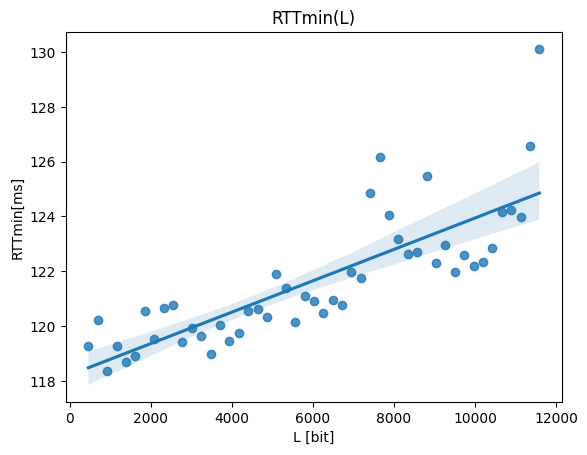

In [6]:
sns.regplot(data=min_time, x=(Lb+28)*8, y=min_time)
print(len(min_time))
plt.title('RTTmin(L)')
plt.xlabel('L [bit]')
plt.ylabel('RTTmin[ms]')
plt.show()

**Andamento RTT massimo**

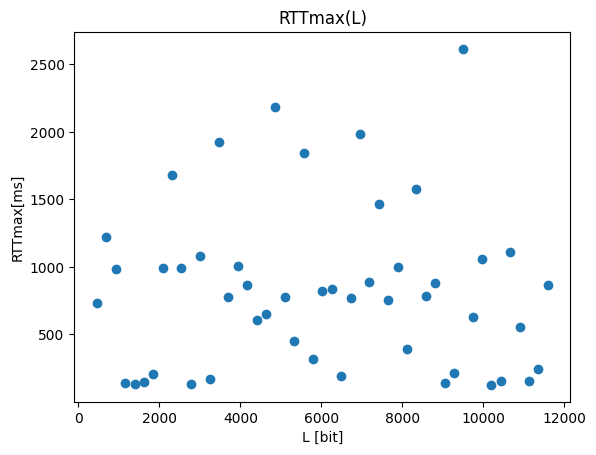

In [7]:
plt.scatter((Lb+28)*8,max_time)
plt.title('RTTmax(L)')
plt.ylabel('RTTmax[ms]')
plt.xlabel('L [bit]')
plt.show()

**Andamento RTT medio**

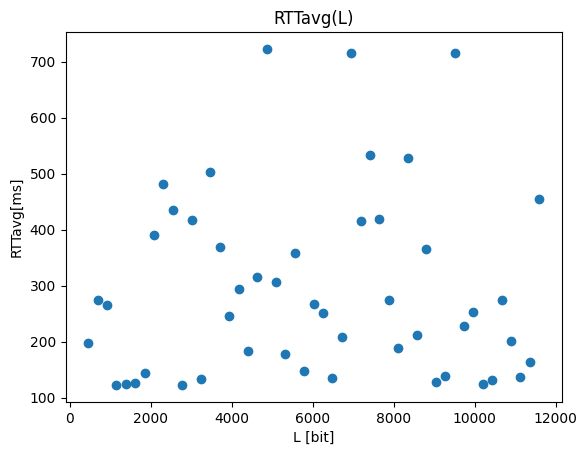

In [8]:
plt.scatter((Lb+28)*8,avg_time)
plt.title('RTTavg(L)')
plt.ylabel('RTTavg[ms]')
plt.xlabel('L [bit]')
plt.show()

**Andamento deviazione standard RTT**

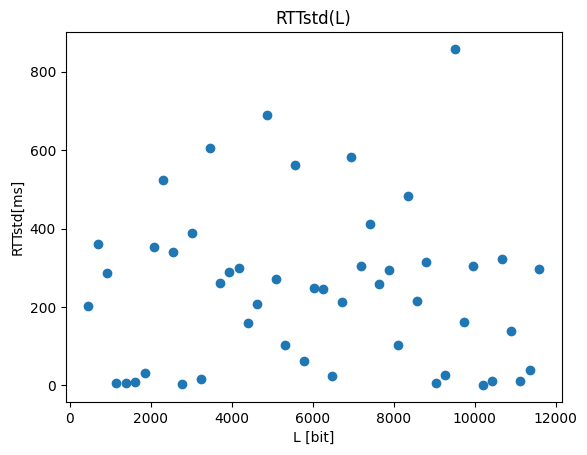

In [9]:
plt.scatter((Lb+28)*8,std_time)
plt.title('RTTstd(L)')
plt.ylabel('RTTstd[ms]')
plt.xlabel('L [bit]')
plt.show()

**Stima di S e S-bottleneck**

In [10]:
#q,m=np.polyfit((Lb+8)*8, min_time, 1) from documentation 'This forms part of the old polynomial API' 
#risultato equivalente alla funzione usata successivamente, cambia ordine valori ritorno
T, a=np.polynomial.polynomial.Polynomial.fit((Lb+28)*8, min_time, 1).convert().coef
print("Coefficiente a: ",a)
s=2*int(TTL)/a
print('stima del throughput supponendo tutti uguali: '+str(s)+' b/ms')
print('stima del throughput supponendo tutti uguali: '+str(s*1000)+' b/s')
s=2/a
print('stima del throughput supponendo bottleneck: '+str(s)+' b/ms')
print('stima del throughput supponendo bottleneck: '+str(s*1000)+' b/s')

Coefficiente a:  0.0005723918015482044
stima del throughput supponendo tutti uguali: 45423.43186900169 b/ms
stima del throughput supponendo tutti uguali: 45423431.86900169 b/s
stima del throughput supponendo bottleneck: 3494.1101437693605 b/ms
stima del throughput supponendo bottleneck: 3494110.1437693606 b/s
